# CA

元胞自动机（Cellular Automata, CA）是一种离散模型，用于模拟复杂系统的时间演化。在一维元胞自动机中，Rule 90 是一个特定的局部规则，它属于二进制元胞自动机，其中每个单元格只有两种状态：0（关闭）或1（打开）。Rule 90 规则定义了如何根据当前状态更新每个单元格的状态。

### Rule 90 规则的工作方式：

Rule 90 是基于每个单元格及其两个邻居的状态来确定下一个时间步的状态。具体来说，Rule 90 规则如下：

- 如果一个单元格的三个邻居（当前单元格和它的左右邻居）的状态组合为 010、101 或 110，则该单元格的下一个状态为 1。
- 在所有其他情况下，单元格的下一个状态为 0。

这个规则可以用一个 3 位的二进制数来表示，其中每一位对应于单元格及其邻居的状态（从左到右：左邻居、当前单元格、右邻居）。Rule 90 的二进制表示为 `100101100`，其中每个数字对应于上述 010、101 和 110 组合的下一个状态。

### Rule 90 规则的数学表示：

如果我们用 `x` 表示当前单元格的状态，用 `y` 表示左边邻居的状态，用 `z` 表示右边邻居的状态，那么 Rule 90 可以表示为：

- `f(y, x, z) = 1` 当 `(y, x, z)` 是 `(0, 1, 0)`、`(1, 0, 1)` 或 `(1, 1, 0)`。
- `f(y, x, z) = 0` 在所有其他情况下。

### Rule 90 规则的演化过程：

1. **初始化**：在一维网格上随机或根据特定模式初始化每个单元格的状态。
2. **迭代**：对于每个时间步，根据 Rule 90 规则更新每个单元格的状态。
3. **更新**：新的状态根据当前状态和邻居的状态计算得出，并替换当前状态。
4. **观察**：观察系统随时间的演化模式。

### Rule 90 的特点：

- Rule 90 是一个不可逆规则，因为它不满足确定性的条件（即不同的状态组合可以导致相同的下一个状态）。
- Rule 90 是一个非线性规则，因为它不遵循线性叠加原理。
- Rule 90 可以产生复杂的空间模式和时间行为，是研究混沌和复杂系统的一个重要模型。

通过模拟 Rule 90，研究人员可以探索简单的局部规则如何导致复杂的全局行为，以及这些行为如何依赖于初始条件和规则参数。


In [6]:
import random

dimension = 1000
num = 20

def rule90(left, right):
    """应用 Rule 90 规则"""
    return (left == 1 and right == 0) or \
           (left == 0 and right == 1)

def evolve(cells):
    """根据 Rule 90 规则演化元胞自动机"""
    new_cells = [rule90(cells[0], cells[-1], cells[1])]  # 处理第一个单元格
    for i in range(1, len(cells) - 1):
        new_cells.append(rule90(cells[i], cells[i-1], cells[i+1]))
    new_cells.append(rule90(cells[-1], cells[0], cells[-2]))  # 处理最后一个单元格
    return new_cells

def print_cells(cells):
    """打印单元格状态，使用 0/1 而不是 True/False"""
    print(''.join(str(int(x)) for x in cells))

# 初始化元胞自动机，长度为 100，随机状态
cells = [random.choice([0, 1]) for _ in range(dimension)]

# 打印初始状态
print("Initial state:")
print_cells(cells)


Initial state:
0011001111100001110111111111010001101011100101110011100100000000011100000110111100101100100010110111001001111001000101111100000100011100010100111000001001100111100101100101101110000100100010100001011110011101100111111001110111011111010111100101100010001011101011010011100011101011001100000111111111010001010000000101010111001111110000100100011110110000101111001111011001010011110001010010010010010110111011001111011110000011110010101010101000100100100111010000011001000111000010011011001010011110110001001100110111001110110110011010001010000101100111000001101101010110100000011110001000101010011101011011110000000000111101101001111011001010110001101111001111000011011100001110101011101010001101000000110011110111110010000110110101111011111100101110101111010101000010001100001100100110100001100110010000000111101110000101111101010000101110010110010010111010111111011000011110110010110000010110010000111011101001010101011000001011011101011001110001000000000100010100110010010011101000100

In [7]:
import torch

# 假设 evolve 和 print_cells 函数已经定义
# evolve(cells): 根据 Rule 90 规则演化元胞自动机
# print_cells(cells): 打印单元格状态

# 存储每次演化后的cells
all_generations = []

# 演化几代
for _ in range(num):  # 演化 10 代
    cells = evolve(cells)
    all_generations.append(cells)  # 保存当前代的cells
    print("\nAfter one generation:")
    print_cells(cells)

# 将所有世代的cells转换为torch.tensor
all_generations_tensor = torch.tensor(all_generations, dtype=torch.int)

print(all_generations_tensor)


After one generation:
01111110001100110101000000010010111000101110010111101110100000001101100011101001110011110101001101011101110011101010010001100010101101101000111011000101111111001110011110011010110010110101000100100100111101011111000011110101010100010001001110011101010100101000110011101101101000111111100011000000010010100010000010000001011110000110010110101100101110010010011110010111100011100110100011011011011001101010111110010100110001100111000000000001010110110111010010001111101011011001011110111100011100101110101111111101011110101101111110010100010010011111011000111011000001100100001100110101010000011101000110100110000000011001011001110010111100001110111010011110011001110101100110100000101000010111001000011111100101000111010011101100010010100001110010100010010000001001010111100111110111100100111111111010000011001010110010010001000010010010111001111011001010001000010111001100101111001110001001111010011010101001100000000111000100110101000111110110101000000010101000111111011011101

In [8]:
import torchhd

rel_rand = torchhd.cosine_similarity(all_generations_tensor, all_generations_tensor)

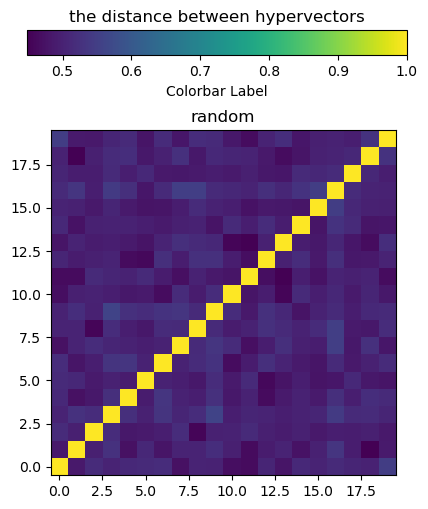

In [9]:
import matplotlib.pyplot as plt
# 创建一个图形窗口
fig, axs = plt.subplots(1, 1, figsize = (5, 5))

# 绘制第一个热力图
cax1 = axs.imshow(rel_rand, origin = 'lower', cmap = 'viridis')  # 'hot'是颜色映射，可以根据需要选择其他颜色映射
axs.set_title('random')


# 创建一个空的子图用于颜色条
cax = fig.add_axes([0.12, 0.95, 0.76, 0.05])  # [left, bottom, width, height]
# 添加颜色条
cbar = fig.colorbar(cax1, cax = cax, orientation='horizontal')

# 设置颜色条的位置
cbar.set_label('Colorbar Label')

# 调整子图之间的间距，为颜色条腾出空间
plt.subplots_adjust(top = 0.8)
plt.title("the distance between hypervectors")
plt.show()

## 图形表示

In [1]:
a=1
for n in range(55):
    print(a, end=", ")
    a ^= a*4

1, 5, 17, 85, 257, 1285, 4369, 21845, 65537, 327685, 1114129, 5570645, 16843009, 84215045, 286331153, 1431655765, 4294967297, 21474836485, 73014444049, 365072220245, 1103806595329, 5519032976645, 18764712120593, 93823560602965, 281479271743489, 1407396358717445, 4785147619639313, 23925738098196565, 72340172838076673, 361700864190383365, 1229782938247303441, 6148914691236517205, 18446744073709551617, 92233720368547758085, 313594649253062377489, 1567973246265311887445, 4740813226943354765569, 23704066134716773827845, 80593824858037031014673, 402969124290185155073365, 1208944266358702884323329, 6044721331793514421616645, 20552052528097949033496593, 102760262640489745167482965, 310698676454186641271095553, 1553493382270933206355477765, 5281877499721172901608624401, 26409387498605864508043122005, 79228162532711081671548469249, 396140812663555408357742346245, 1346878763056088388416323977233, 6734393815280441942081619886165, 20361637770906747989587956596993, 101808188854533739947939782984965,

In [5]:
a = 1
width = 50  # 初始化宽度为1，因为第一行只有一个数字

for n in range(15):  # 总共11行
    # 计算当前行的字符串长度
    num_str = '{:b}'.format(a)
    # 计算需要填充的空格数，使得数字居中
    padding = (width - len(num_str)) // 2
    # 打印前导空格
    print(' ' * padding, end='')
    # 打印数字
    print(num_str, end='')
    # 打印后续空格
    print(' ' * padding)
    # 更新宽度，为下一行做准备
    # width += len(num_str) + 1
    # 更新a的值
    a ^= a << 2

# 移除最后一行后面的换行符
print()

                        1                        
                       101                       
                      10001                      
                     1010101                     
                    100000001                    
                   10100000101                   
                  1000100010001                  
                 101010101010101                 
                10000000000000001                
               1010000000000000101               
              100010000000000010001              
             10101010000000001010101             
            1000000010000000100000001            
           101000001010000010100000101           
          10001000100010001000100010001          

